In [ ]:
SPARK FOUNDATION TASK-1 DATA SCIENCE AND BUSSINESS ANALYTICS
                                                                                                                 NAME: KRISHA KHANDHAR

In [20]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [5]:
url = "http://bit.ly/w-data"
df= pd.read_csv(url)
print("Data imported successfully")
#Displaying first ten records
df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
#Printing the shape and summary of data
print("Shape:",df.shape)
print("Summary:")
df.describe()

Shape: (25, 2)
Summary:


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


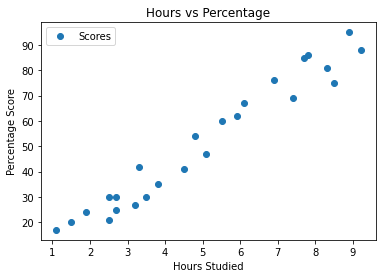

In [7]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

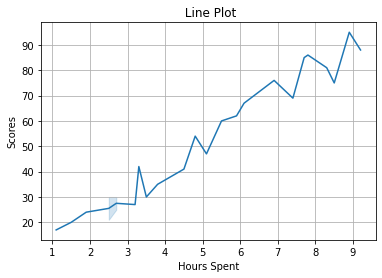

In [8]:
sns.lineplot(x='Hours',y='Scores',data=df) 
plt.xlabel('Hours Spent')
plt.ylabel('Scores')
plt.title(' Line Plot')
plt.grid()

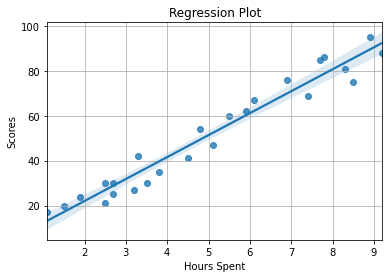

In [9]:
sns.regplot(x='Hours',y='Scores',data=df)
plt.xlabel('Hours Spent')
plt.ylabel('Scores')
plt.title('Regression Plot')
plt.grid()

In [10]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [12]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


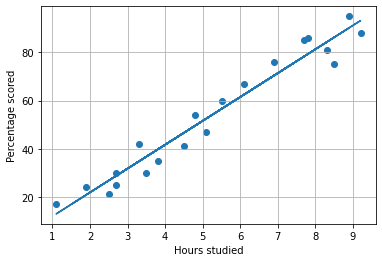

In [13]:
# Plotting the regression line on training data
line = regressor.coef_*X+regressor.intercept_ #the line equation is in the form of Y=mX+c

# Plotting for the test data
plt.scatter(X_train, y_train)
plt.plot(X, line);
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")
plt.grid()

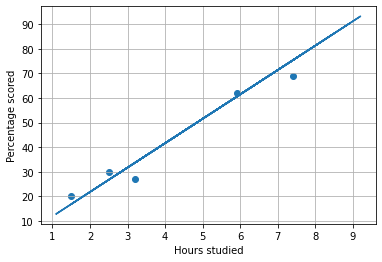

In [14]:
# Plotting the regression line on test data
line = regressor.coef_*X+regressor.intercept_ #the line equation is in the form of Y=mX+c

# Plotting for the test data
plt.scatter(X_test, y_test)
plt.plot(X, line);
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")
plt.grid()

In [15]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [17]:
#finding the model accuracy
from sklearn import metrics
accuracy=metrics.r2_score(y_test,y_pred)
print("Accuracy Score of Model: ",accuracy*100,'%')

Accuracy Score of Model:  94.54906892105356 %


In [18]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [19]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('R-Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
R-Squared Error: 4.6474476121003665
